In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Load FakeNewsNet dataset
gossip_fake = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/gossipcop_fake.csv')
gossip_real = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/gossipcop_real.csv')
politifact_fake = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/politifact_fake.csv')
politifact_real = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/politifact_real.csv')

# Assign labels (0 = Real, 1 = Fake)
politifact_fake["label"] = 1
politifact_real["label"] = 0
gossipcop_fake["label"] = 1
gossipcop_real["label"] = 0

# Combine datasets
fakenewsnet_data = pd.concat([politifact_fake, politifact_real, gossipcop_fake, gossipcop_real]).reset_index(drop=True)

# Select relevant text column (Ensure column name is correct)
text_column = "text"  # Update if necessary
fakenewsnet_data = fakenewsnet_data[[text_column, "label"]].dropna()

# Apply text cleaning
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower().strip()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

fakenewsnet_data["clean_text"] = fakenewsnet_data[text_column].astype(str).apply(clean_text)

# Split dataset into training and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    fakenewsnet_data["clean_text"].tolist(), fakenewsnet_data["label"].tolist(),
    test_size=0.2, random_state=42, stratify=fakenewsnet_data["label"]
)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)  # Using unigrams, bigrams, trigrams

# Machine Learning Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine (SVM)": SVC(kernel="linear")
}

# Train and evaluate models
tfidf_results = {}

for model_name, model in models.items():
    print(f"\n🚀 Training {model_name}...")

    # Build a pipeline (TF-IDF + Model)
    pipeline = Pipeline([
        ("tfidf", vectorizer),
        ("classifier", model)
    ])
    
    # Train the model
    pipeline.fit(train_texts, train_labels)

    # Predictions
    y_pred = pipeline.predict(test_texts)

    # Compute metrics
    results = {
        "Accuracy": accuracy_score(test_labels, y_pred),
        "Precision": precision_score(test_labels, y_pred),
        "Recall": recall_score(test_labels, y_pred),
        "F1-Score": f1_score(test_labels, y_pred)
    }

    # Save results
    tfidf_results[model_name] = results

    # Print classification report
    print(f"\n📊 {model_name} Performance:")
    print(classification_report(test_labels, y_pred, target_names=["Real", "Fake"]))

    # Confusion Matrix
    cm = confusion_matrix(test_labels, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()



🚀 Training Logistic Regression...

📊 Logistic Regression Performance:
              precision    recall  f1-score   support

        Real       0.53      0.23      0.32       902
        Fake       0.68      0.89      0.77      1657

    accuracy                           0.66      2559
   macro avg       0.61      0.56      0.54      2559
weighted avg       0.63      0.66      0.61      2559



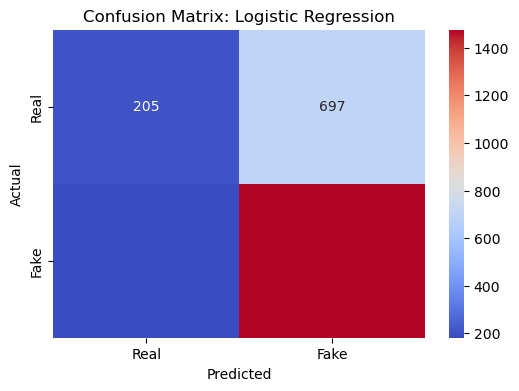


🚀 Training Random Forest...

📊 Random Forest Performance:
              precision    recall  f1-score   support

        Real       0.48      0.25      0.32       902
        Fake       0.67      0.85      0.75      1657

    accuracy                           0.64      2559
   macro avg       0.58      0.55      0.54      2559
weighted avg       0.60      0.64      0.60      2559



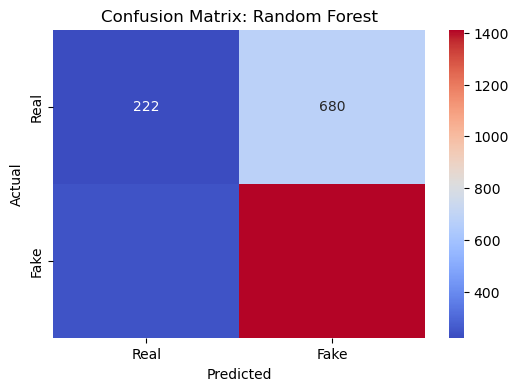


🚀 Training Support Vector Machine (SVM)...

📊 Support Vector Machine (SVM) Performance:
              precision    recall  f1-score   support

        Real       0.50      0.25      0.34       902
        Fake       0.68      0.86      0.76      1657

    accuracy                           0.65      2559
   macro avg       0.59      0.56      0.55      2559
weighted avg       0.62      0.65      0.61      2559



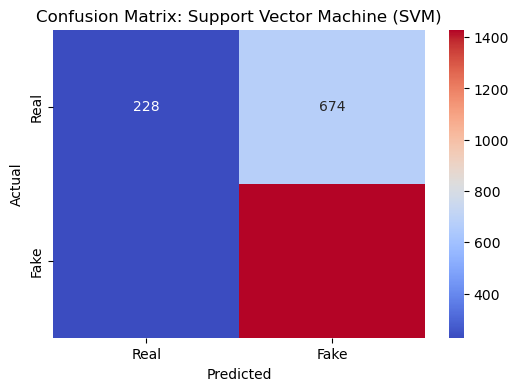


📊 Model Performance on LIAR Dataset:
                              Accuracy  Precision    Recall  F1-Score
Logistic Regression           0.656897   0.679245  0.890766  0.770757
Random Forest                 0.638531   0.674952  0.852142  0.753268
Support Vector Machine (SVM)  0.647519   0.679505  0.862402  0.760106


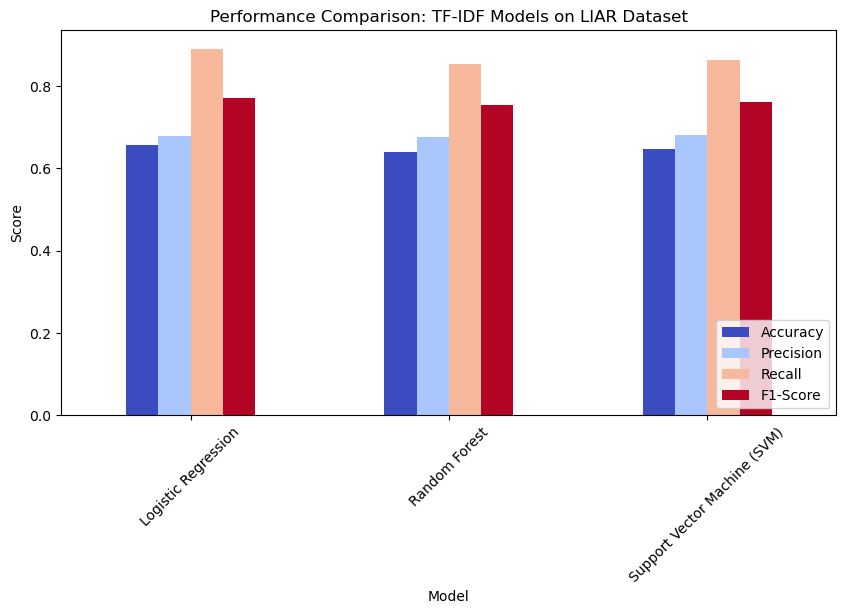

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# ✅ Step 1: Load and Preprocess the LIAR Dataset
# Load LIAR dataset (update paths if running locally)
train = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/liar_dataset/train.tsv', sep='\t', header=None)
valid = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/liar_dataset/valid.tsv', sep='\t', header=None)
test  = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/liar_dataset/test.tsv', sep='\t', header=None)

# Define column names
column_names = ["id", "label", "statement", "subject", "speaker", "speaker_job", "state", 
                "party", "barely_true", "false", "half_true", "mostly_true", "pants_on_fire", "context"]

train.columns = column_names
valid.columns = column_names
test.columns = column_names

# Combine datasets
liar_data = pd.concat([train, valid, test], ignore_index=True)

# Convert labels to binary (Real = 0, Fake = 1)
def binary_label(label):
    return 0 if label in ["true", "mostly-true"] else 1

liar_data['binary_label'] = liar_data['label'].apply(binary_label)

# Select relevant columns
liar_data = liar_data[["statement", "binary_label"]].dropna()

# ✅ Step 2: Text Preprocessing
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower().strip()
    return text

liar_data["clean_statement"] = liar_data["statement"].astype(str).apply(clean_text)

# ✅ Step 3: Split Data into Training & Testing Sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    liar_data["clean_statement"].tolist(), liar_data["binary_label"].tolist(),
    test_size=0.2, random_state=42, stratify=liar_data["binary_label"]
)

# ✅ Step 4: TF-IDF Feature Engineering & Model Selection
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=5000, stop_words="english")

# Define Machine Learning Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine (SVM)": SVC(kernel="linear")
}

# Train and Evaluate Models
tfidf_results = {}

for model_name, model in models.items():
    print(f"\n🚀 Training {model_name}...")

    # Build Pipeline (TF-IDF + Model)
    pipeline = Pipeline([
        ("tfidf", vectorizer),
        ("classifier", model)
    ])
    
    # Train Model
    pipeline.fit(train_texts, train_labels)

    # Predictions
    y_pred = pipeline.predict(test_texts)

    # Compute Metrics
    results = {
        "Accuracy": accuracy_score(test_labels, y_pred),
        "Precision": precision_score(test_labels, y_pred),
        "Recall": recall_score(test_labels, y_pred),
        "F1-Score": f1_score(test_labels, y_pred)
    }

    # Save Results
    tfidf_results[model_name] = results

    # Print Classification Report
    print(f"\n📊 {model_name} Performance:")
    print(classification_report(test_labels, y_pred, target_names=["Real", "Fake"]))

    # Confusion Matrix
    cm = confusion_matrix(test_labels, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

# ✅ Step 5: Compare Model Performance
# Convert Results to DataFrame for Visualization
results_df = pd.DataFrame(tfidf_results).T

# Print Results
print("\n📊 Model Performance on LIAR Dataset:")
print(results_df)

# Plot Performance Comparison
results_df.plot(kind="bar", figsize=(10, 5), colormap="coolwarm")
plt.xticks(rotation=45)
plt.title("Performance Comparison: TF-IDF Models on LIAR Dataset")
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend(loc="lower right")
plt.show()



🚀 Training Logistic Regression...

📊 Logistic Regression Performance:
              precision    recall  f1-score   support

        Real       0.54      0.23      0.32       902
        Fake       0.68      0.89      0.77      1657

    accuracy                           0.66      2559
   macro avg       0.61      0.56      0.55      2559
weighted avg       0.63      0.66      0.61      2559



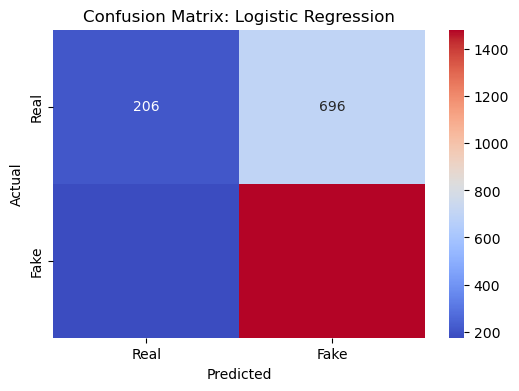


🚀 Training Random Forest...

📊 Random Forest Performance:
              precision    recall  f1-score   support

        Real       0.49      0.26      0.34       902
        Fake       0.68      0.85      0.76      1657

    accuracy                           0.64      2559
   macro avg       0.58      0.56      0.55      2559
weighted avg       0.61      0.64      0.61      2559



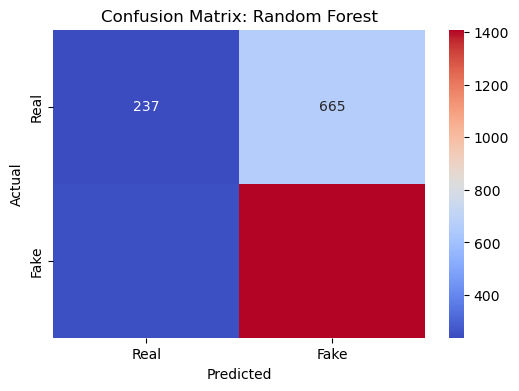


🚀 Training Support Vector Machine (SVM)...

📊 Support Vector Machine (SVM) Performance:
              precision    recall  f1-score   support

        Real       0.50      0.25      0.34       902
        Fake       0.68      0.86      0.76      1657

    accuracy                           0.65      2559
   macro avg       0.59      0.56      0.55      2559
weighted avg       0.62      0.65      0.61      2559



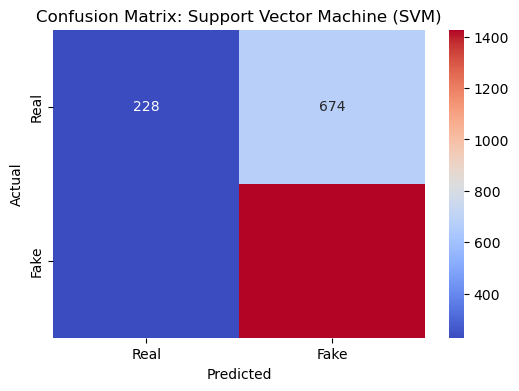


📊 Model Performance on LIAR Dataset:
                              Accuracy  Precision    Recall  F1-Score
Logistic Regression           0.660023   0.680587  0.894991  0.773201
Random Forest                 0.643611   0.679518  0.850935  0.755627
Support Vector Machine (SVM)  0.646737   0.679200  0.861195  0.759447


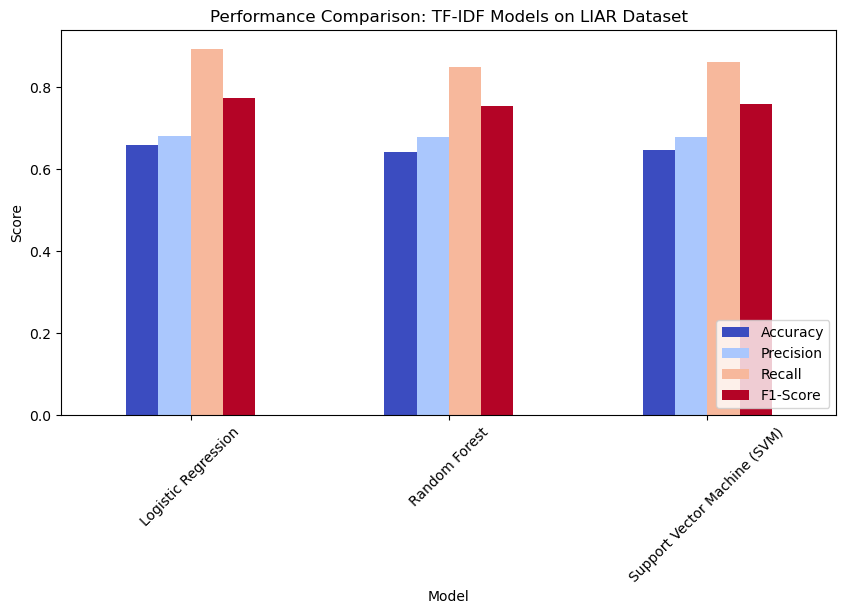

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# ✅ Step 1: Load and Preprocess the LIAR Dataset
# Load LIAR dataset (update paths if running locally)
train = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/liar_dataset/train.tsv', sep='\t', header=None)
valid = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/liar_dataset/valid.tsv', sep='\t', header=None)
test  = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/liar_dataset/test.tsv', sep='\t', header=None)

# Define column names
column_names = ["id", "label", "statement", "subject", "speaker", "speaker_job", "state", 
                "party", "barely_true", "false", "half_true", "mostly_true", "pants_on_fire", "context"]

train.columns = column_names
valid.columns = column_names
test.columns = column_names

# Combine datasets
liar_data = pd.concat([train, valid, test], ignore_index=True)

# Convert labels to binary (Real = 0, Fake = 1)
def binary_label(label):
    return 0 if label in ["true", "mostly-true"] else 1

liar_data['binary_label'] = liar_data['label'].apply(binary_label)

# Select relevant columns
liar_data = liar_data[["statement", "binary_label"]].dropna()

# ✅ Step 2: Text Preprocessing
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower().strip()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

liar_data["clean_statement"] = liar_data["statement"].astype(str).apply(clean_text)

# ✅ Step 3: Split Data into Training & Testing Sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    liar_data["clean_statement"].tolist(), liar_data["binary_label"].tolist(),
    test_size=0.2, random_state=42, stratify=liar_data["binary_label"]
)

# ✅ Step 4: TF-IDF Feature Engineering & Model Selection
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=5000, stop_words="english")

# Define Machine Learning Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine (SVM)": SVC(kernel="linear")
}

# Train and Evaluate Models
tfidf_results = {}

for model_name, model in models.items():
    print(f"\n🚀 Training {model_name}...")

    # Build Pipeline (TF-IDF + Model)
    pipeline = Pipeline([
        ("tfidf", vectorizer),
        ("classifier", model)
    ])
    
    # Train Model
    pipeline.fit(train_texts, train_labels)

    # Predictions
    y_pred = pipeline.predict(test_texts)

    # Compute Metrics
    results = {
        "Accuracy": accuracy_score(test_labels, y_pred),
        "Precision": precision_score(test_labels, y_pred),
        "Recall": recall_score(test_labels, y_pred),
        "F1-Score": f1_score(test_labels, y_pred)
    }

    # Save Results
    tfidf_results[model_name] = results

    # Print Classification Report
    print(f"\n📊 {model_name} Performance:")
    print(classification_report(test_labels, y_pred, target_names=["Real", "Fake"]))

    # Confusion Matrix
    cm = confusion_matrix(test_labels, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

# ✅ Step 5: Compare Model Performance
# Convert Results to DataFrame for Visualization
results_df = pd.DataFrame(tfidf_results).T

# Print Results
print("\n📊 Model Performance on LIAR Dataset:")
print(results_df)

# Plot Performance Comparison
results_df.plot(kind="bar", figsize=(10, 5), colormap="coolwarm")
plt.xticks(rotation=45)
plt.title("Performance Comparison: TF-IDF Models on LIAR Dataset")
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend(loc="lower right")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /aul/homes/msidd040/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



🚀 Training Logistic Regression on ISOT Dataset...

📊 Logistic Regression Performance on ISOT:
              precision    recall  f1-score   support

        Real       0.99      0.99      0.99      4284
        Fake       0.99      0.99      0.99      4696

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



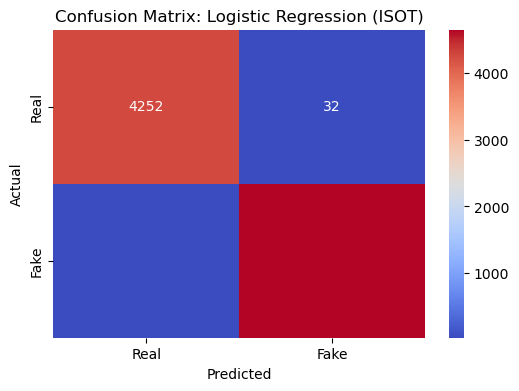


🚀 Training Random Forest on ISOT Dataset...

📊 Random Forest Performance on ISOT:
              precision    recall  f1-score   support

        Real       1.00      1.00      1.00      4284
        Fake       1.00      1.00      1.00      4696

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



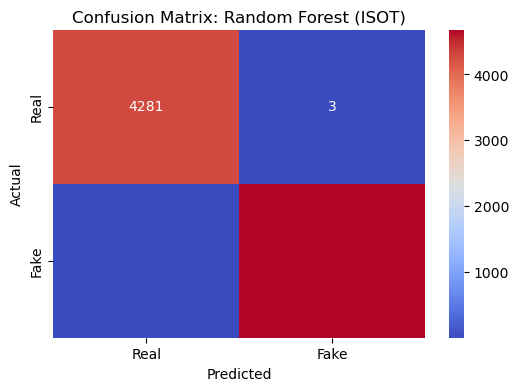


🚀 Training Support Vector Machine (SVM) on ISOT Dataset...

📊 Support Vector Machine (SVM) Performance on ISOT:
              precision    recall  f1-score   support

        Real       0.99      1.00      1.00      4284
        Fake       1.00      0.99      1.00      4696

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



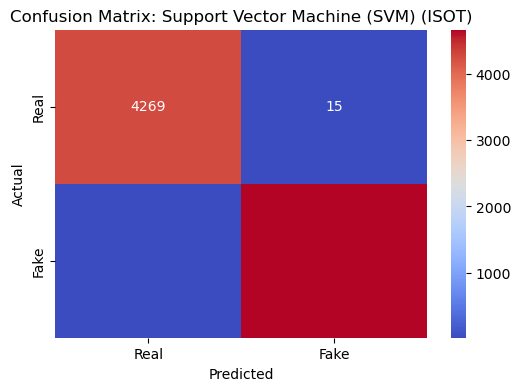


📊 Model Performance on ISOT Fake News Dataset:
                              Accuracy  Precision    Recall  F1-Score
Logistic Regression           0.991091   0.993162  0.989779  0.991468
Random Forest                 0.997773   0.999359  0.996380  0.997867
Support Vector Machine (SVM)  0.995657   0.996800  0.994889  0.995844


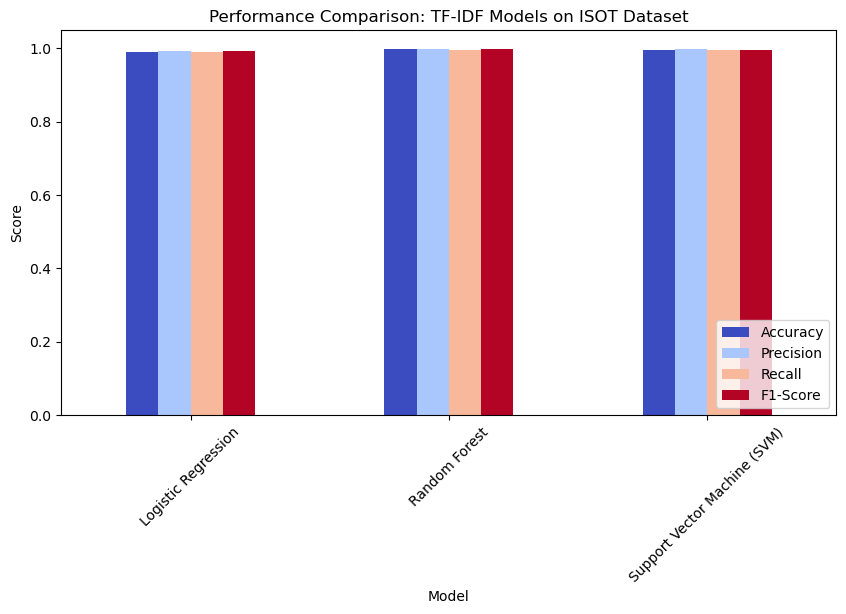

KeyError: "['text'] not in index"

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from nltk.corpus import stopwords

# Load Stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# ✅ Step 1: Load and Preprocess the ISOT Fake News Dataset
# Paths to ISOT dataset
true_path = "/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/News_dataset/True.csv"
fake_path = "/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/News_dataset/Fake.csv"

# Load datasets
true_news = pd.read_csv(true_path)
fake_news = pd.read_csv(fake_path)

# Add Labels
true_news["label"] = 0  # Real News
fake_news["label"] = 1  # Fake News

# Combine the datasets
isot_data = pd.concat([true_news, fake_news], ignore_index=True)

# Select relevant columns
isot_data = isot_data[["text", "label"]].dropna()

# Text Cleaning Function
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower().strip()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

isot_data["clean_text"] = isot_data["text"].astype(str).apply(clean_text)

# ✅ Step 2: Split Data into Training & Testing Sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    isot_data["clean_text"].tolist(), isot_data["label"].tolist(),
    test_size=0.2, random_state=42, stratify=isot_data["label"]
)

# ✅ Step 3: TF-IDF Feature Engineering & Model Selection
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=5000, stop_words="english")

# Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine (SVM)": SVC(kernel="linear")
}

# Train and Evaluate Models
isot_results = {}

for model_name, model in models.items():
    print(f"\n🚀 Training {model_name} on ISOT Dataset...")

    # Build Pipeline
    pipeline = Pipeline([
        ("tfidf", vectorizer),
        ("classifier", model)
    ])
    
    # Train Model
    pipeline.fit(train_texts, train_labels)

    # Predictions
    y_pred = pipeline.predict(test_texts)

    # Compute Metrics
    results = {
        "Accuracy": accuracy_score(test_labels, y_pred),
        "Precision": precision_score(test_labels, y_pred),
        "Recall": recall_score(test_labels, y_pred),
        "F1-Score": f1_score(test_labels, y_pred)
    }

    # Save Results
    isot_results[model_name] = results

    # Print Classification Report
    print(f"\n📊 {model_name} Performance on ISOT:")
    print(classification_report(test_labels, y_pred, target_names=["Real", "Fake"]))

    # Confusion Matrix
    cm = confusion_matrix(test_labels, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: {model_name} (ISOT)")
    plt.show()

# ✅ Step 4: Compare Model Performance for ISOT
isot_results_df = pd.DataFrame(isot_results).T
print("\n📊 Model Performance on ISOT Fake News Dataset:")
print(isot_results_df)

# Plot ISOT Performance
isot_results_df.plot(kind="bar", figsize=(10, 5), colormap="coolwarm")
plt.xticks(rotation=45)
plt.title("Performance Comparison: TF-IDF Models on ISOT Dataset")
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend(loc="lower right")
plt.show()

# ✅ Step 5: Load and Preprocess FakeNewsNet Dataset
# Paths to FakeNewsNet dataset
politifact_real = pd.read_csv("/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/politifact_real.csv")
politifact_fake = pd.read_csv("/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/politifact_fake.csv")
gossipcop_real = pd.read_csv("/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/gossipcop_real.csv")
gossipcop_fake = pd.read_csv("/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/gossipcop_fake.csv")

# Add Labels
politifact_real["label"] = 0  # Real
politifact_fake["label"] = 1  # Fake
gossipcop_real["label"] = 0  # Real
gossipcop_fake["label"] = 1  # Fake

# Combine datasets
fakenewsnet_data = pd.concat([politifact_real, politifact_fake, gossipcop_real, gossipcop_fake], ignore_index=True)

# Select relevant columns
fakenewsnet_data = fakenewsnet_data[["title", "label"]].dropna()

# Preprocess Text
fakenewsnet_data["clean_text"] = fakenewsnet_data["title"].astype(str).apply(clean_text)

# ✅ Step 6: Train/Test Split for FakeNewsNet
train_texts, test_texts, train_labels, test_labels = train_test_split(
    fakenewsnet_data["clean_text"].tolist(), fakenewsnet_data["label"].tolist(),
    test_size=0.2, random_state=42, stratify=fakenewsnet_data["label"]
)

# ✅ Step 7: Train and Evaluate Models on FakeNewsNet
fakenewsnet_results = {}

for model_name, model in models.items():
    print(f"\n🚀 Training {model_name} on FakeNewsNet...")

    # Build Pipeline
    pipeline = Pipeline([
        ("tfidf", vectorizer),
        ("classifier", model)
    ])
    
    # Train Model
    pipeline.fit(train_texts, train_labels)

    # Predictions
    y_pred = pipeline.predict(test_texts)

    # Compute Metrics
    results = {
        "Accuracy": accuracy_score(test_labels, y_pred),
        "Precision": precision_score(test_labels, y_pred),
        "Recall": recall_score(test_labels, y_pred),
        "F1-Score": f1_score(test_labels, y_pred)
    }

    # Save Results
    fakenewsnet_results[model_name] = results

    # Print Classification Report
    print(f"\n📊 {model_name} Performance on FakeNewsNet:")
    print(classification_report(test_labels, y_pred, target_names=["Real", "Fake"]))

    # Confusion Matrix
    cm = confusion_matrix(test_labels, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: {model_name} (FakeNewsNet)")
    plt.show()

# ✅ Step 8: Compare Model Performance for FakeNewsNet
fakenewsnet_results_df = pd.DataFrame(fakenewsnet_results).T
print("\n📊 Model Performance on FakeNewsNet Dataset:")
print(fakenewsnet_results_df)

# Plot FakeNewsNet Performance
fakenewsnet_results_df.plot(kind="bar", figsize=(10, 5), colormap="coolwarm")
plt.xticks(rotation=45)
plt.title("Performance Comparison: TF-IDF Models on FakeNewsNet Dataset")
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend(loc="lower right")
plt.show()


In [4]:
fakenewsnet_data.sample(2)

,id,news_url,title,tweet_ids,label
15181,gossipcop-931212,https://deadline.com/2018/05/e-ashlee-simpson-...,"E!: Ashlee Simpson-Ross & Evan Ross, Busy Phil...",991373468494163968\t991373674891677697\t991374...,0
12363,gossipcop-871005,http://www.trueara.com/chad-johnson-says-he-ca...,Chad Johnson Says He Can't Deal With Karina Sm...,NaN,0



🚀 Training Logistic Regression on FakeNewsNet...

📊 Logistic Regression Performance on FakeNewsNet:
              precision    recall  f1-score   support

        Real       0.85      0.96      0.90      3489
        Fake       0.80      0.47      0.59      1151

    accuracy                           0.84      4640
   macro avg       0.83      0.72      0.75      4640
weighted avg       0.84      0.84      0.82      4640



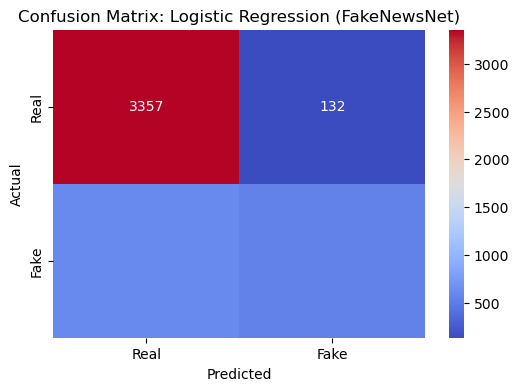


🚀 Training Random Forest on FakeNewsNet...

📊 Random Forest Performance on FakeNewsNet:
              precision    recall  f1-score   support

        Real       0.86      0.93      0.89      3489
        Fake       0.71      0.53      0.60      1151

    accuracy                           0.83      4640
   macro avg       0.78      0.73      0.75      4640
weighted avg       0.82      0.83      0.82      4640



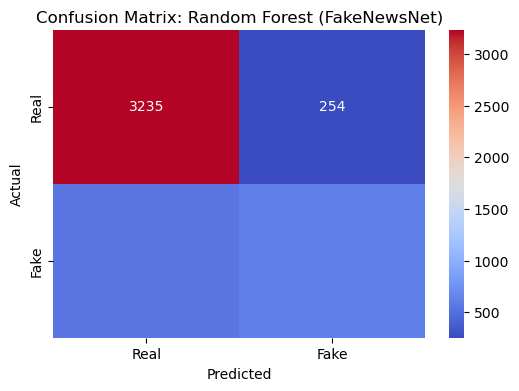


🚀 Training Support Vector Machine (SVM) on FakeNewsNet...

📊 Support Vector Machine (SVM) Performance on FakeNewsNet:
              precision    recall  f1-score   support

        Real       0.86      0.95      0.90      3489
        Fake       0.77      0.51      0.62      1151

    accuracy                           0.84      4640
   macro avg       0.81      0.73      0.76      4640
weighted avg       0.84      0.84      0.83      4640



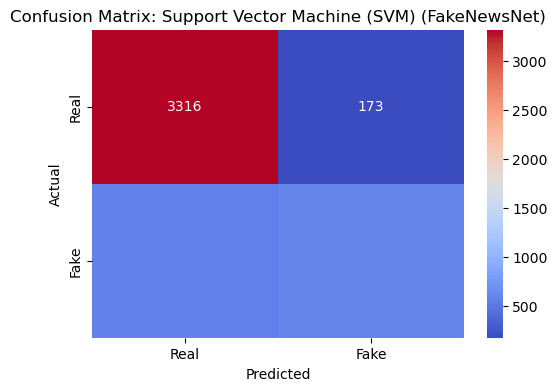


📊 Model Performance on FakeNewsNet Dataset:
                              Accuracy  Precision    Recall  F1-Score
Logistic Regression           0.840517   0.804444  0.471764  0.594743
Random Forest                 0.828233   0.705336  0.528236  0.604074
Support Vector Machine (SVM)  0.842026   0.773560  0.513467  0.617232


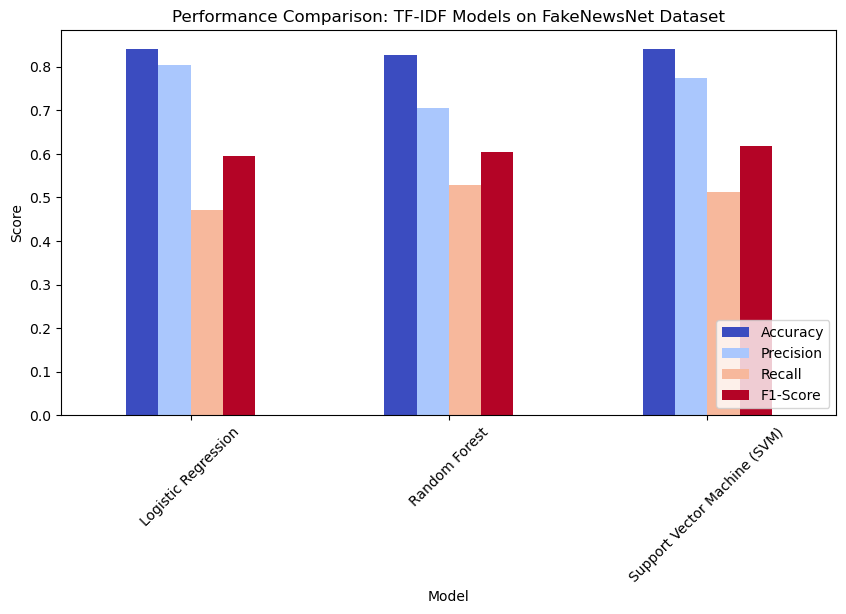

In [5]:
politifact_real = pd.read_csv("/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/politifact_real.csv")
politifact_fake = pd.read_csv("/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/politifact_fake.csv")
gossipcop_real = pd.read_csv("/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/gossipcop_real.csv")
gossipcop_fake = pd.read_csv("/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/gossipcop_fake.csv")

# Add Labels
politifact_real["label"] = 0  # Real
politifact_fake["label"] = 1  # Fake
gossipcop_real["label"] = 0  # Real
gossipcop_fake["label"] = 1  # Fake

# Combine datasets
fakenewsnet_data = pd.concat([politifact_real, politifact_fake, gossipcop_real, gossipcop_fake], ignore_index=True)

# Select relevant columns
fakenewsnet_data = fakenewsnet_data[["title", "label"]].dropna()

# Preprocess Text
fakenewsnet_data["clean_text"] = fakenewsnet_data["title"].astype(str).apply(clean_text)

# ✅ Step 6: Train/Test Split for FakeNewsNet
train_texts, test_texts, train_labels, test_labels = train_test_split(
    fakenewsnet_data["clean_text"].tolist(), fakenewsnet_data["label"].tolist(),
    test_size=0.2, random_state=42, stratify=fakenewsnet_data["label"]
)

# ✅ Step 7: Train and Evaluate Models on FakeNewsNet
fakenewsnet_results = {}

for model_name, model in models.items():
    print(f"\n🚀 Training {model_name} on FakeNewsNet...")

    # Build Pipeline
    pipeline = Pipeline([
        ("tfidf", vectorizer),
        ("classifier", model)
    ])
    
    # Train Model
    pipeline.fit(train_texts, train_labels)

    # Predictions
    y_pred = pipeline.predict(test_texts)

    # Compute Metrics
    results = {
        "Accuracy": accuracy_score(test_labels, y_pred),
        "Precision": precision_score(test_labels, y_pred),
        "Recall": recall_score(test_labels, y_pred),
        "F1-Score": f1_score(test_labels, y_pred)
    }

    # Save Results
    fakenewsnet_results[model_name] = results

    # Print Classification Report
    print(f"\n📊 {model_name} Performance on FakeNewsNet:")
    print(classification_report(test_labels, y_pred, target_names=["Real", "Fake"]))

    # Confusion Matrix
    cm = confusion_matrix(test_labels, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: {model_name} (FakeNewsNet)")
    plt.show()

# ✅ Step 8: Compare Model Performance for FakeNewsNet
fakenewsnet_results_df = pd.DataFrame(fakenewsnet_results).T
print("\n📊 Model Performance on FakeNewsNet Dataset:")
print(fakenewsnet_results_df)

# Plot FakeNewsNet Performance
fakenewsnet_results_df.plot(kind="bar", figsize=(10, 5), colormap="coolwarm")
plt.xticks(rotation=45)
plt.title("Performance Comparison: TF-IDF Models on FakeNewsNet Dataset")
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend(loc="lower right")
plt.show()


In [ ]:
All dataset

FakeNewsNet Columns: Index(['id', 'news_url', 'title', 'tweet_ids', 'label'], dtype='object')
Total samples after merging: 80885
label
0    43365
1    37520
Name: count, dtype: int64


[nltk_data] Downloading package stopwords to
[nltk_data]     /aul/homes/msidd040/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



🚀 Training Logistic Regression on Merged Dataset...

📊 Logistic Regression Performance on Merged Dataset:
              precision    recall  f1-score   support

        Real       0.85      0.88      0.87      8673
        Fake       0.85      0.82      0.84      7504

    accuracy                           0.85     16177
   macro avg       0.85      0.85      0.85     16177
weighted avg       0.85      0.85      0.85     16177



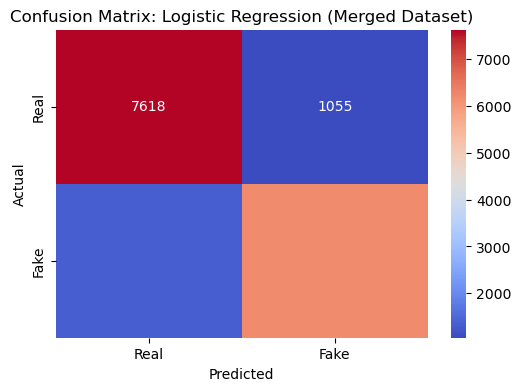


🚀 Training Random Forest on Merged Dataset...

📊 Random Forest Performance on Merged Dataset:
              precision    recall  f1-score   support

        Real       0.89      0.86      0.88      8673
        Fake       0.84      0.88      0.86      7504

    accuracy                           0.87     16177
   macro avg       0.87      0.87      0.87     16177
weighted avg       0.87      0.87      0.87     16177



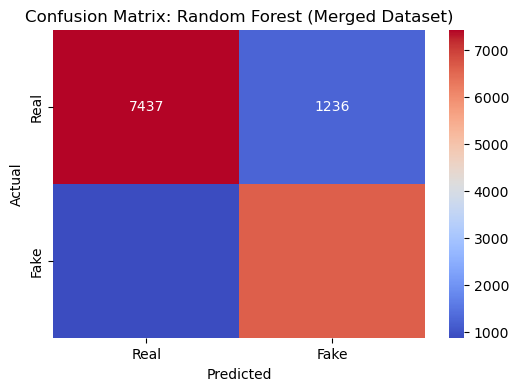


🚀 Training Support Vector Machine (SVM) on Merged Dataset...

📊 Support Vector Machine (SVM) Performance on Merged Dataset:
              precision    recall  f1-score   support

        Real       0.85      0.89      0.87      8673
        Fake       0.86      0.82      0.84      7504

    accuracy                           0.86     16177
   macro avg       0.86      0.85      0.85     16177
weighted avg       0.86      0.86      0.85     16177



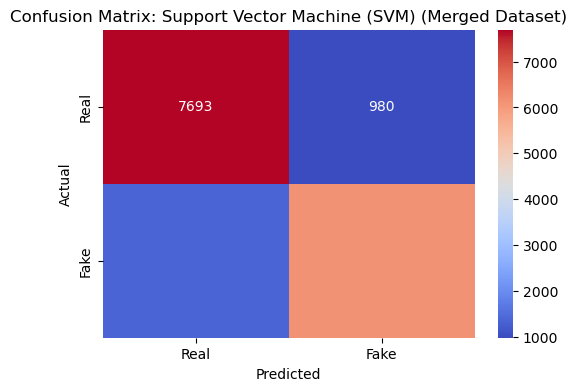


📊 Model Performance on Merged Fake News Dataset:
                              Accuracy  Precision    Recall  F1-Score
Logistic Regression           0.853125   0.854242  0.823961  0.838828
Random Forest                 0.869382   0.842808  0.883129  0.862498
Support Vector Machine (SVM)  0.855103   0.862360  0.818230  0.839716


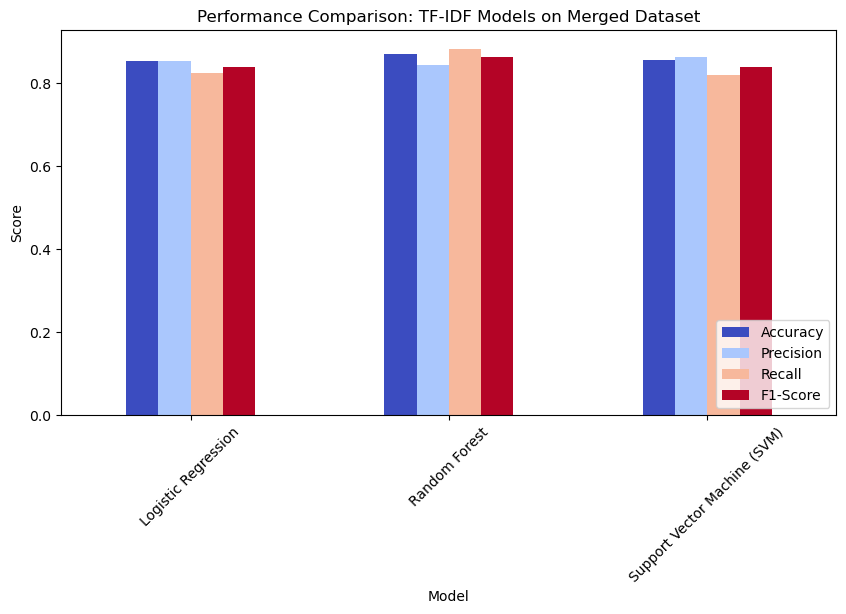

In [6]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from nltk.corpus import stopwords

# ✅ Step 1: Load Datasets

# 1️⃣ Load LIAR Dataset
train = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/liar_dataset/train.tsv', sep='\t', header=None)
valid = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/liar_dataset/valid.tsv', sep='\t', header=None)
test  = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/liar_dataset/test.tsv', sep='\t', header=None)

column_names = ["id", "label", "statement", "subject", "speaker", "speaker_job", "state", 
                "party", "barely_true", "false", "half_true", "mostly_true", "pants_on_fire", "context"]

train.columns = column_names
valid.columns = column_names
test.columns = column_names

liar_data = pd.concat([train, valid, test], ignore_index=True)

def binary_label(label):
    return 0 if label in ["true", "mostly-true"] else 1

liar_data['label'] = liar_data['label'].apply(binary_label)
liar_data = liar_data[["statement", "label"]].dropna().rename(columns={"statement": "text"})

# 2️⃣ Load ISOT Dataset
true_news = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/News_dataset/True.csv')
fake_news = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/News_dataset/Fake.csv')

true_news["label"] = 0  # Real
fake_news["label"] = 1  # Fake

isot_data = pd.concat([true_news, fake_news], ignore_index=True)
isot_data = isot_data[["text", "label"]].dropna()

# 3️⃣ Load FakeNewsNet Dataset
# politifact_real = pd.read_csv("/mnt/data/politifact_real.csv")
# politifact_fake = pd.read_csv("/mnt/data/politifact_fake.csv")
# gossipcop_real = pd.read_csv("/mnt/data/gossipcop_real.csv")
# gossipcop_fake = pd.read_csv("/mnt/data/gossipcop_fake.csv")

gossipcop_fake = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/gossipcop_fake.csv')
gossipcop_real = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/gossipcop_real.csv')
politifact_fake = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/politifact_fake.csv')
politifact_real = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/politifact_real.csv')

politifact_real["label"] = 0
politifact_fake["label"] = 1
gossipcop_real["label"] = 0
gossipcop_fake["label"] = 1

fakenewsnet_data = pd.concat([politifact_real, politifact_fake, gossipcop_real, gossipcop_fake], ignore_index=True)

# Check column names to standardize them
print("FakeNewsNet Columns:", fakenewsnet_data.columns)

# Choose a correct column for news text (it could be 'content', 'title', or 'text')
if "content" in fakenewsnet_data.columns:
    text_column = "content"
elif "title" in fakenewsnet_data.columns:
    text_column = "title"
else:
    text_column = "text"

fakenewsnet_data = fakenewsnet_data[[text_column, "label"]].dropna().rename(columns={text_column: "text"})

# ✅ Step 2: Merge Datasets
all_data = pd.concat([liar_data, isot_data, fakenewsnet_data], ignore_index=True)

print(f"Total samples after merging: {len(all_data)}")
print(all_data["label"].value_counts())

# ✅ Step 3: Text Preprocessing
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower().strip()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

all_data["clean_text"] = all_data["text"].astype(str).apply(clean_text)

# ✅ Step 4: Split Data into Training & Testing Sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    all_data["clean_text"].tolist(), all_data["label"].tolist(),
    test_size=0.2, random_state=42, stratify=all_data["label"]
)

# ✅ Step 5: TF-IDF Feature Engineering & Model Selection
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=5000, stop_words="english")

# Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine (SVM)": SVC(kernel="linear")
}

# Train and Evaluate Models
merged_results = {}

for model_name, model in models.items():
    print(f"\n🚀 Training {model_name} on Merged Dataset...")

    # Build Pipeline
    pipeline = Pipeline([
        ("tfidf", vectorizer),
        ("classifier", model)
    ])
    
    # Train Model
    pipeline.fit(train_texts, train_labels)

    # Predictions
    y_pred = pipeline.predict(test_texts)

    # Compute Metrics
    results = {
        "Accuracy": accuracy_score(test_labels, y_pred),
        "Precision": precision_score(test_labels, y_pred),
        "Recall": recall_score(test_labels, y_pred),
        "F1-Score": f1_score(test_labels, y_pred)
    }

    # Save Results
    merged_results[model_name] = results

    # Print Classification Report
    print(f"\n📊 {model_name} Performance on Merged Dataset:")
    print(classification_report(test_labels, y_pred, target_names=["Real", "Fake"]))

    # Confusion Matrix
    cm = confusion_matrix(test_labels, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: {model_name} (Merged Dataset)")
    plt.show()

# ✅ Step 6: Compare Model Performance
merged_results_df = pd.DataFrame(merged_results).T
print("\n📊 Model Performance on Merged Fake News Dataset:")
print(merged_results_df)

# Plot Performance Comparison
merged_results_df.plot(kind="bar", figsize=(10, 5), colormap="coolwarm")
plt.xticks(rotation=45)
plt.title("Performance Comparison: TF-IDF Models on Merged Dataset")
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend(loc="lower right")
plt.show()



📊 Model Performance on Merged Fake News Dataset:
                              Accuracy  Precision    Recall  F1-Score
Logistic Regression           0.853125   0.854242  0.823961  0.838828
Random Forest                 0.869382   0.842808  0.883129  0.862498
Support Vector Machine (SVM)  0.855103   0.862360  0.818230  0.839716


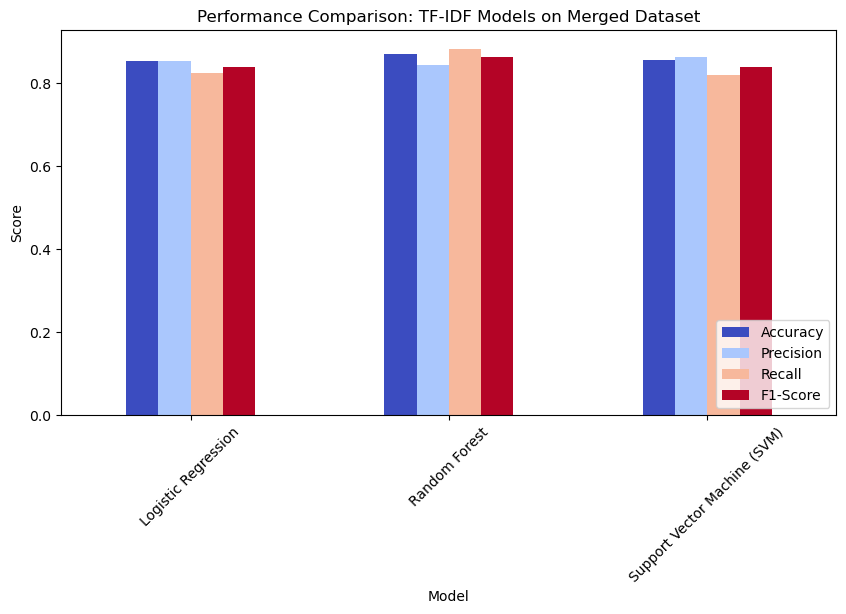

In [7]:
merged_results_df = pd.DataFrame(merged_results).T
print("\n📊 Model Performance on Merged Fake News Dataset:")
print(merged_results_df)

# Plot Performance Comparison
merged_results_df.plot(kind="bar", figsize=(10, 5), colormap="coolwarm")
plt.xticks(rotation=45)
plt.title("Performance Comparison: TF-IDF Models on Merged Dataset")
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend(loc="lower right")
plt.show()
